In [58]:
from utils import Graph
import scipy.interpolate as interpolate
from math import sqrt, log
import matplotlib.pyplot as plt
import csv
import numpy as np
import glob
import re

T = 87
n = 2.11e22

def mobility(E):
    a0 = 551.6
    a1 = 7953.7
    a2 = 4440.43
    a3 = 4.29
    a4 = 43.63
    a5 = 0.2053
    T0 = 89

    num = a0 + a1*E + a2*E**(3/2) + a3*E**(5/2)
    den = 1 + (a1/a0)*E + a4*E**2 + a5*E**3

    return (num / den) * (T / T0)**(-3/2)

file_list_1d = glob.glob('simulation-runs/1d/*.txt')
file_list_3d = glob.glob('simulation-runs/3d/*.txt')

file_tree = [{}, {}]

for file in file_list_1d:
        key = int(re.search(r'(\d*)(?:V)', file).group(1))
        if (key in file_tree[0]):
            file_tree[0][key].append(file)
        else:
            file_tree[0][key] = [file]

for file in file_list_3d:
        key = int(re.search(r'(\d*)(?:V)', file).group(1))
        if (key in file_tree[1]):
            file_tree[1][key].append(file)
        else:
            file_tree[1][key] = [file]

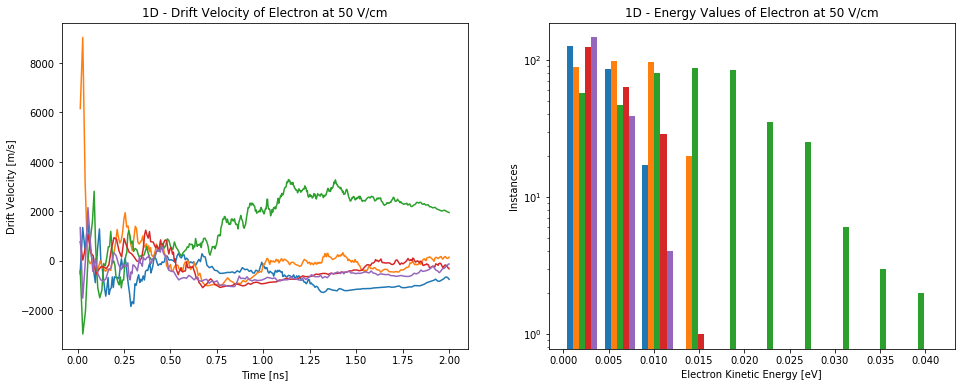

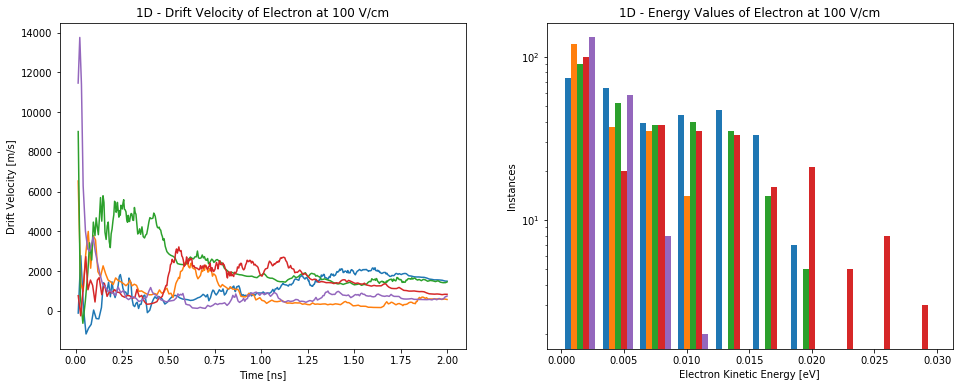

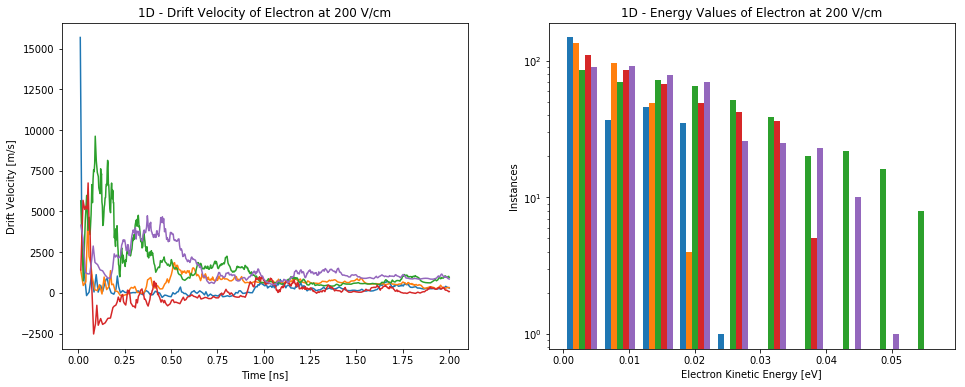

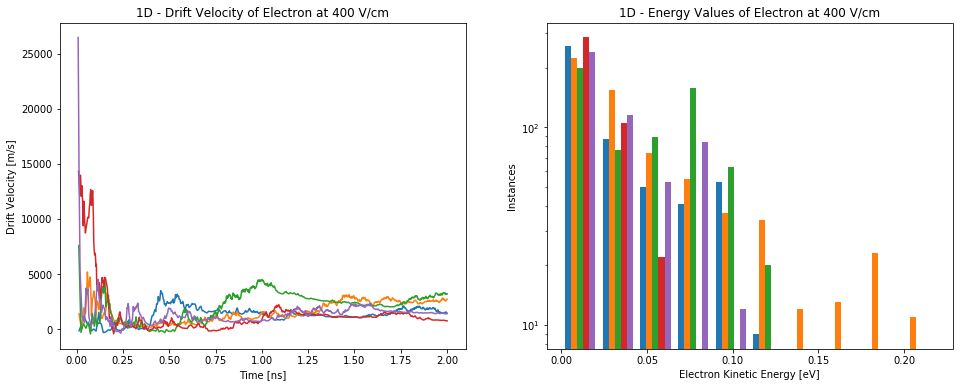

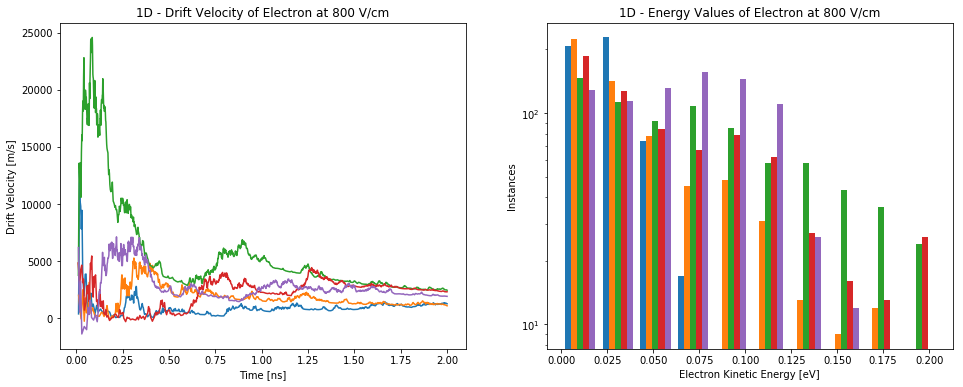

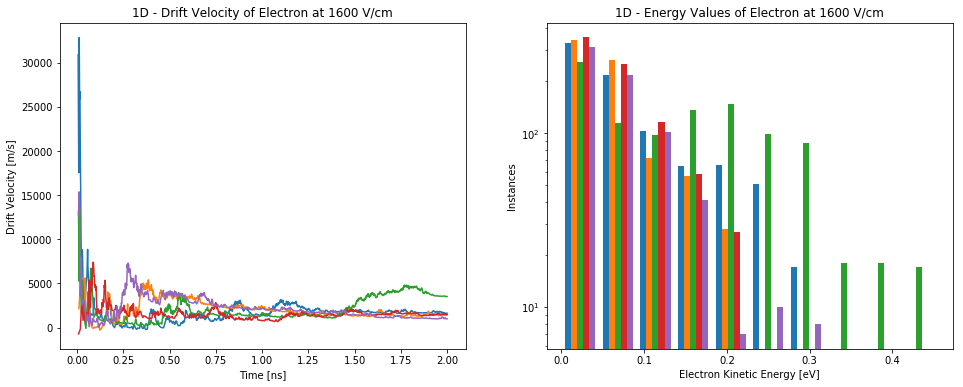

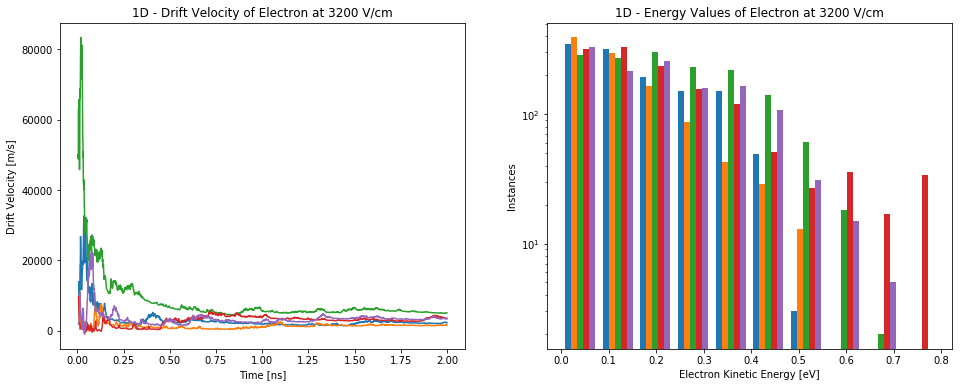

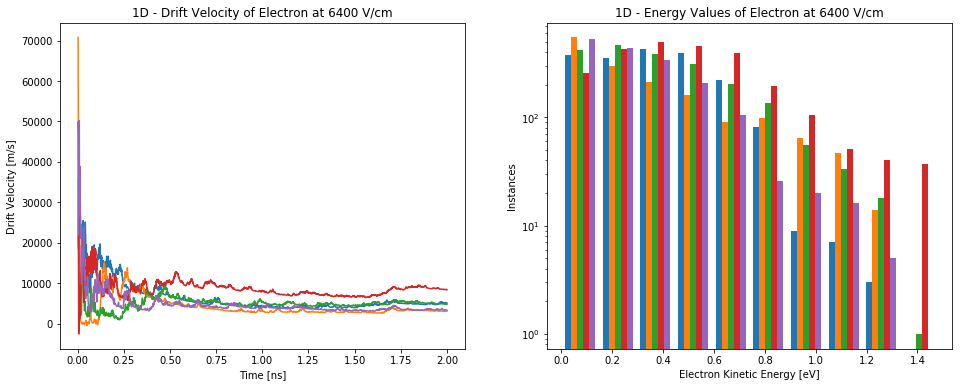

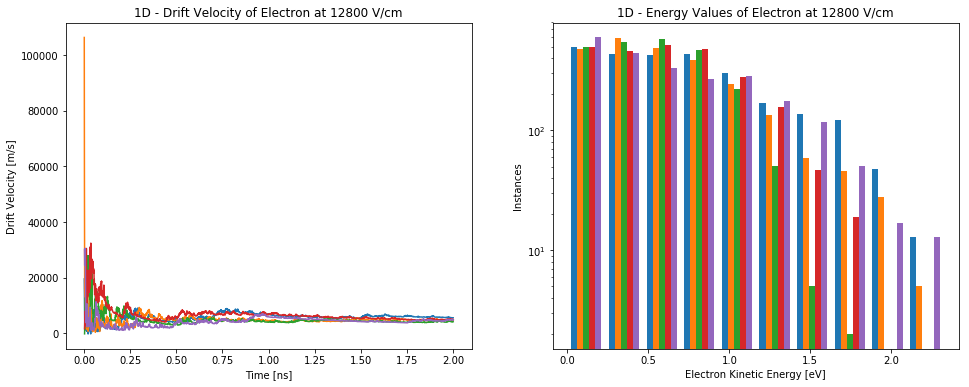

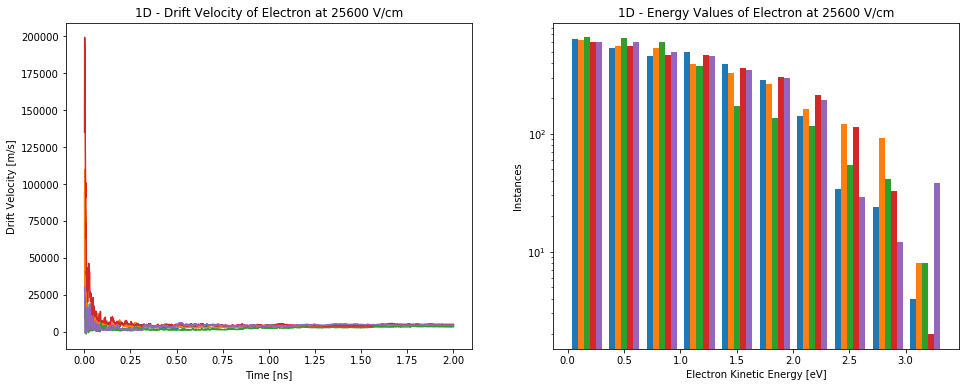

In [59]:
for key, value in sorted(file_tree[0].items()):
    group = Graph(value)
    
    time, vel = group.drift_velocity_plot()
    ke = group.energy_plot()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    
    ax1.set_title('1D - Drift Velocity of Electron at %i V/cm'%key)
    
    ax1.set_xlabel('Time [ns]')
    ax1.set_ylabel('Drift Velocity [m/s]')
    
    for i, t in enumerate(time):
        ax1.plot(t, vel[i])

    ax2.hist(ke)
    
    ax2.set_title('1D - Energy Values of Electron at %i V/cm'%key)
    
    ax2.set_xlabel('Electron Kinetic Energy [eV]')
    ax2.set_ylabel('Instances')
    
    ax2.set_yscale('log')
    plt.show()

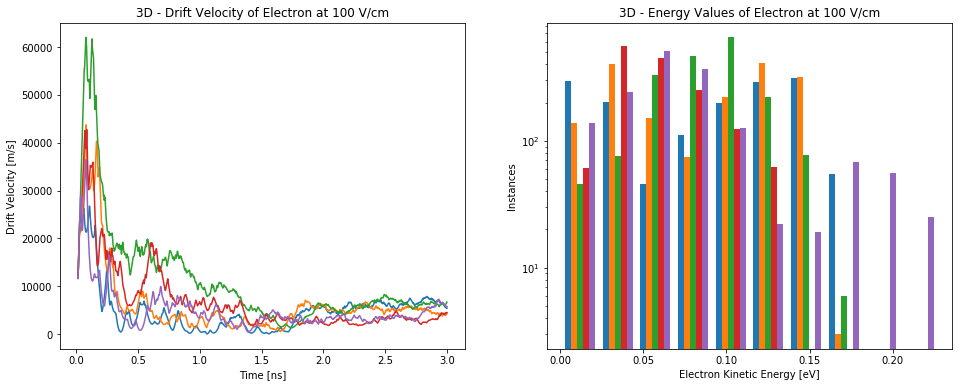

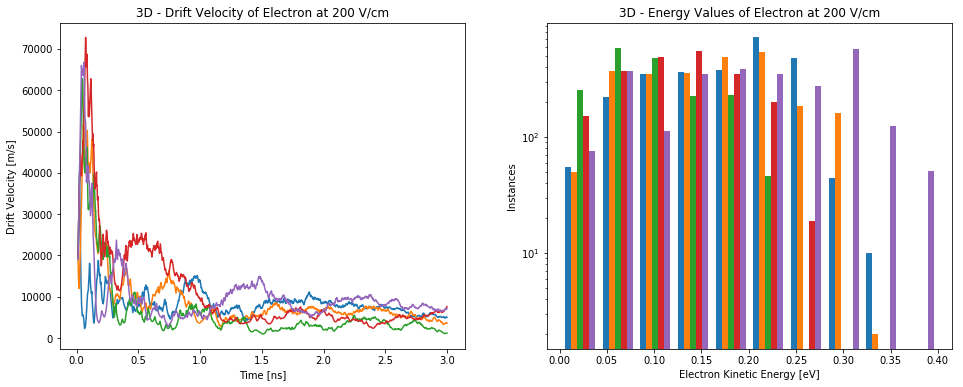

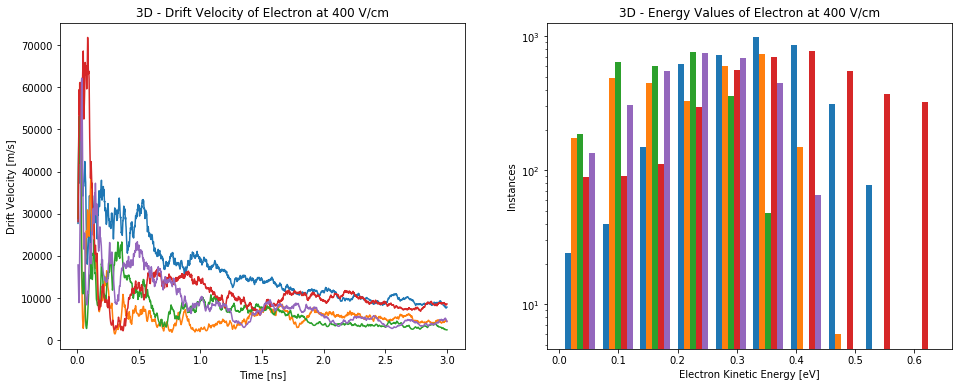

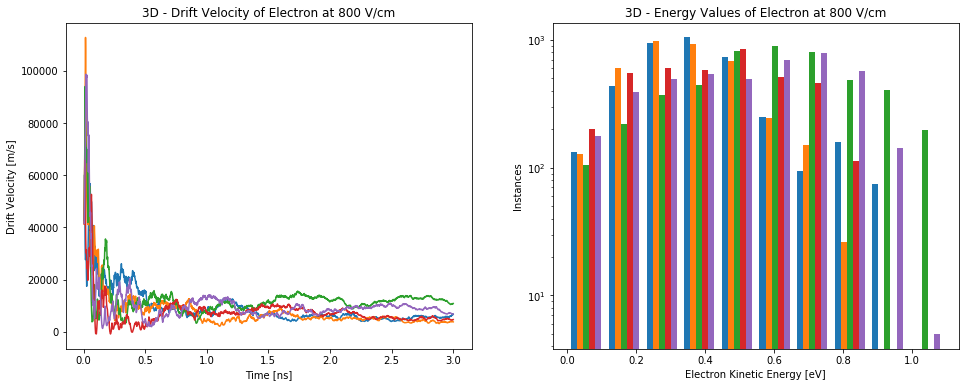

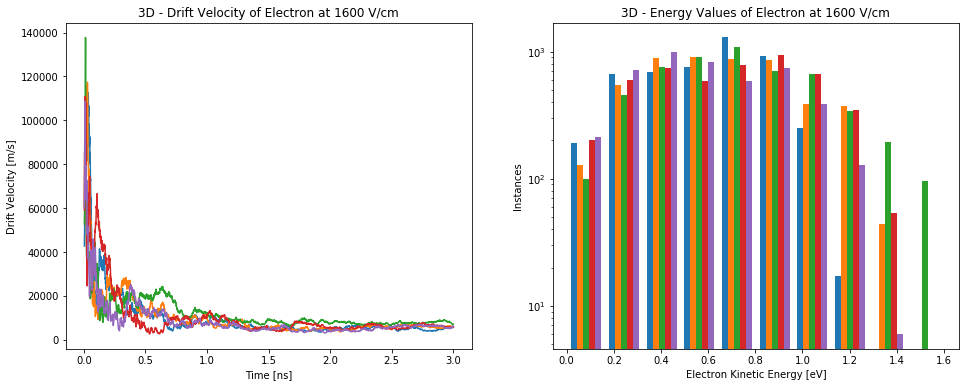

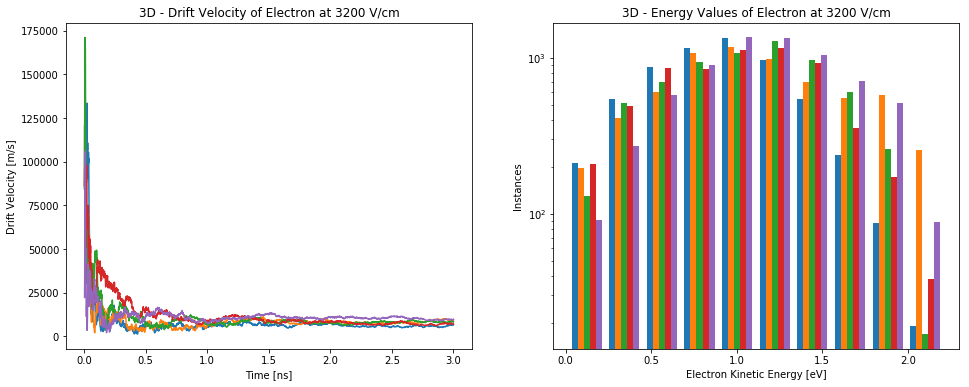

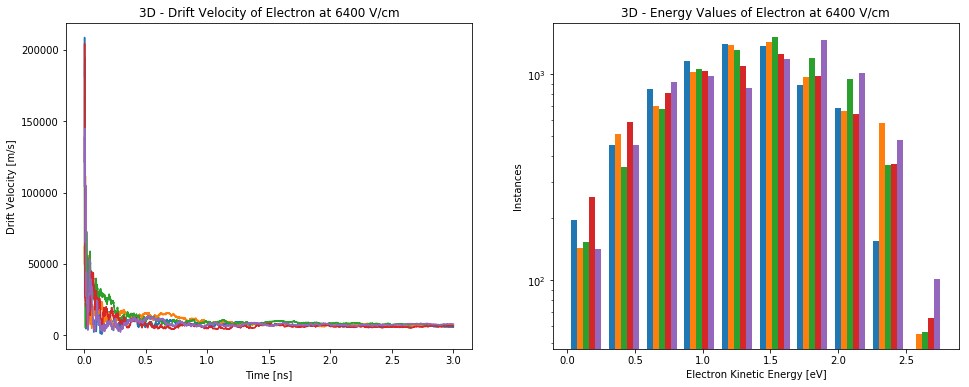

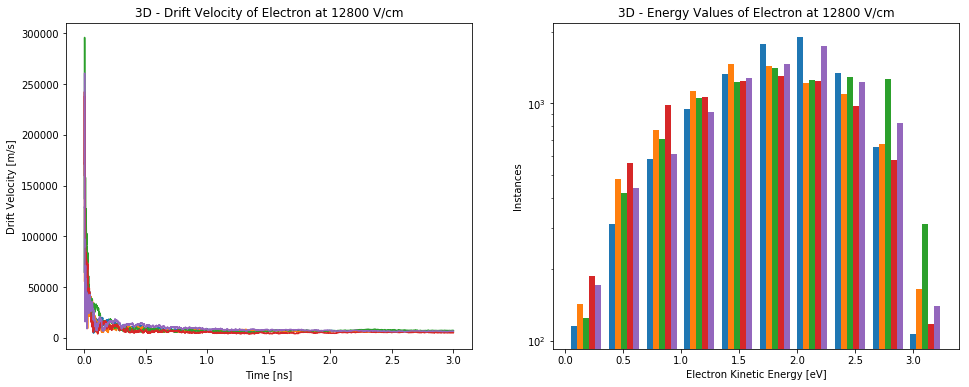

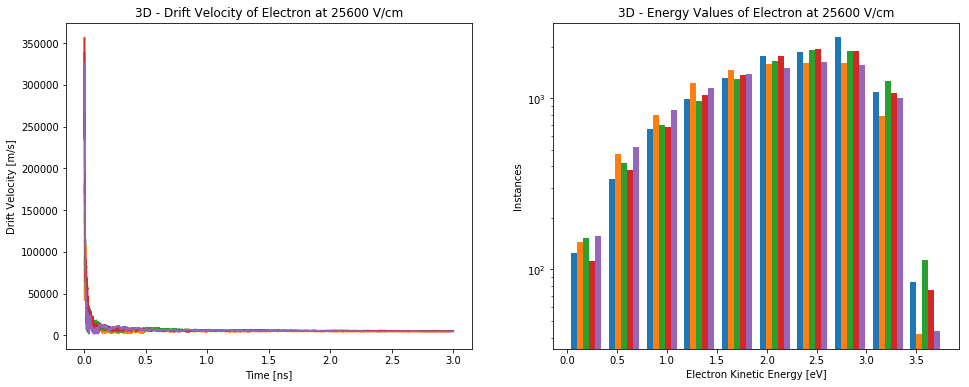

In [54]:
for key, value in sorted(file_tree[1].items()):
    group = Graph(value)
    
    time, vel = group.drift_velocity_plot()
    ke = group.energy_plot()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    
    ax1.set_title('3D - Drift Velocity of Electron at %i V/cm'%key)
    
    ax1.set_xlabel('Time [ns]')
    ax1.set_ylabel('Drift Velocity [m/s]')
    
    for i, t in enumerate(time):
        ax1.plot(t, vel[i])

    ax2.hist(ke)
    
    ax2.set_title('3D - Energy Values of Electron at %i V/cm'%key)
    
    ax2.set_xlabel('Electron Kinetic Energy [eV]')
    ax2.set_ylabel('Instances')
    
    ax2.set_yscale('log')
    plt.show()

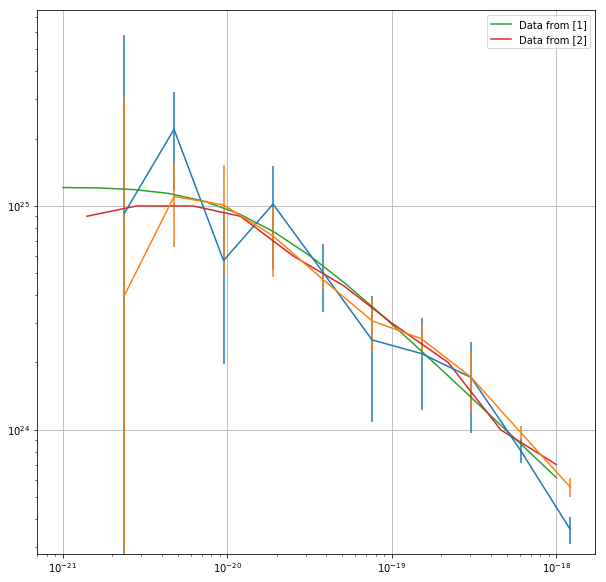

In [60]:
volts = [[], []]
means = [[], []]
std_devs = [[], []]

fig = plt.figure(figsize=(10,10))

for i in range(2):
    for key, value in sorted(file_tree[i].items()):
        graph = Graph(value)
        volts[i].append(key)
        means[i].append(graph.drift_mean())
        std_devs[i].append(graph.drift_std_dev())

        x, y, err = [], [], []
        
    for j, mu in enumerate(means[i]):
        x.append(float(volts[i][j]) / n)
        y.append(means[i][j] * (n / float(volts[i][j])) * 1e2)
        err.append(std_devs[i][j] * (n / float(volts[i][j])) * 1e2)

    plt.errorbar(x, y, yerr=err)

x = np.logspace(-21, -18, 15)
y = mobility(x * n * 1e-3) * n

a = [1.4e-21, 2.8e-21, 6.2e-21, 1.2e-20, 2.5e-20, 5.1e-20, 1e-19, 2.2e-19, 4.6e-19, 1e-18]
b = [9e24, 10e24, 10e24, 9e24, 6e24, 4.4e24, 3e24, 2e24, 1e24, 7e23]

plt.plot(x, y, label='Data from [1]')
plt.plot(a, b, label='Data from [2]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()
